In [1]:
import pandas as pd
import numpy as np
from tkinter import *

# to print everything
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read csv into memory, later just query sql table
dt = pd.read_csv('bet365_outcome_features.csv')

In [2]:
# Create drop down boxes
options = np.unique(dt['league'])
master = Tk()
master.title('Pick the league')
variable = StringVar(master)
variable.set(options[0]) # default value
w = OptionMenu(master, variable, *options)
w.pack()
mainloop()
league = variable.get()
df = dt[dt['league'] == league]

options = np.unique(df['home_team'])
master = Tk()
master.title('Pick a team')
variable = StringVar(master)
variable.set(options[0]) # default value
w = OptionMenu(master, variable, *options)
w.pack()
mainloop()
team1 = variable.get()

options = np.unique(df['home_team'])
master = Tk()
master.title('Pick another team')
variable = StringVar(master)
variable.set(options[0]) # default value
w = OptionMenu(master, variable, *options)
w.pack()
mainloop()
team2 = variable.get()

''

''

''

In [3]:
dt1 = dt[(dt.home_team == team1) & (dt.away_team == team2)]
dt2 = dt[(dt.home_team == team2) & (dt.away_team == team1)]
df = pd.concat([dt1, dt2])

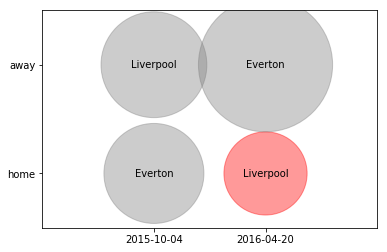

In [9]:
import matplotlib.pyplot as plt

n_games = df['home_team'].size

# x is integers from 1 to n_games for home teams then 1 to n_games for away
x = np.concatenate([np.linspace(1, n_games, n_games)]*2)

# y is home_teams first at y=1 then away teams at y=y_height
y_height = 3
y = np.concatenate([np.ones(n_games), y_height*np.ones(n_games)])

# sizes of bubbles are odds of each team
sizes = np.concatenate([df['home_closing'], df['away_closing']])

# names of teams
team_names = np.concatenate([df['home_team'], df['away_team']])

# colors is the color of each bubble where team1 = blue and team2  = red 
colors = ['grey']*n_games*2
i = 0 # i is the row of df
while i < n_games:
    outcome = df['outcome'].values[i]
    if outcome == 'home':
        team = df['home_team'].values[i]
        if team == team1:
            colors[i] = 'blue'
        else:
            colors[i] = 'red'
    elif outcome == 'away':
        team = df['away_team'].values[i]
        if team == team1:
            colors[n_games + i] = 'blue'
        else:
            colors[n_games + i] = 'red'
    i = i+1

# Make plot = p
p = plt.scatter(x,y, s = sizes*1000*(6-n_games), c = colors, alpha = 0.4)
p = plt.xlim(0, n_games + 1)
p = plt.ylim(0,y_height + 1)
p = plt.yticks([1, y_height], ['home', 'away'])
p = plt.xticks(x[0:n_games], df['match_date'])
plt.rcParams["figure.figsize"] = [9,9]
#plt.show()

# add text to each point to plot p
i = 0
while i < n_games*2:
    p = plt.text(x[i], y[i], team_names[i], 
             horizontalalignment='center', 
             verticalalignment='center')
    i = i+1
plt.show()
#p.plt.text(0.5, 0.5, 'matplotlib', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)